# Water Potability Prediction Using Supervised Machine Learning

## Project Objective
The objective of this project is to predict whether water is safe for drinking
based on various physicochemical parameters using supervised machine learning
techniques.

## Why This Project?
Access to clean drinking water is a major concern. Manual testing is expensive
and time-consuming. Machine learning can help automate water quality assessment.

## Output Variable
Potability:
0 → Not safe for drinking  
1 → Safe for drinking

# Data Cleaning and EDA Execution 

### Data Cleaning using pandas

In [409]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [410]:
df=pd.read_csv("water_potability.csv")

In [411]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [413]:
df.iloc[:,[0]].isnull().sum()

ph    491
dtype: int64

 Observation:      

   Here we are checking the column having column index 1 contain how many null values 
                 
   So we checked it 491 null values are there , after that we will check for all column on the basis of comand 'df.info()'

In [414]:
df.shape

(3276, 10)

In [415]:
df['ph']=df['ph'].fillna(df['ph'].median())

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [417]:
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].median())

In [418]:
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

In [419]:
df.shape

(3276, 10)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [421]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [422]:
df.duplicated().sum().item()

0

### EXploratory Data Analysis(EDA)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [424]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [425]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

Observations: 

  'Potability' is the output column whch contain two classes 0 and 1 
  
  Rest of the columns are the input columns means feature ('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity')

  0 means water 'not safe to drink' and 1 means water 'safe to drink'
  

# Univariate Analysis 

In [426]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [427]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [428]:
df['Potability']=df['Potability'].astype('object')

In [429]:
def univariate(df):
    for col in df.columns:
        if df[col].dtype=='float64':
            fig, axes =plt.subplots(1,2,figsize=(12,6))
            sns.histplot(df[col],bins=20,kde=True,ax=axes[0])
            axes[0].set_title(f'Histogram for {col}')

            sns.boxplot(df[col],ax=axes[1])
            axes[1].set_title(f'Box Plot for {col}')

            plt.tight_layout()
            plt.show()
            display(df[col].describe())
        elif df[col].dtype=='object':
            fig, axes=plt.subplots(1,2,figsize=(12,6))
            sns.countplot(x=df[col],ax=axes[0])
            axes[0].set_title(f'Countplot of {col}')

            sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values,ax=axes[1])
            axes[1].set_title(f'Barplot of {col}')


            plt.show()
            

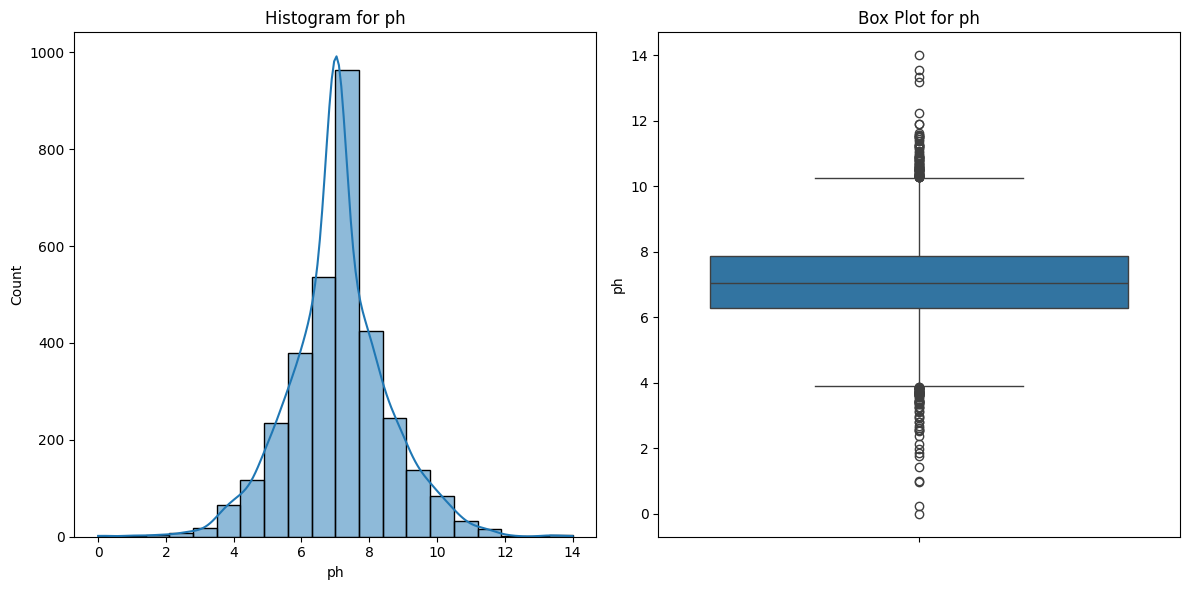

count    3276.000000
mean        7.074194
std         1.470040
min         0.000000
25%         6.277673
50%         7.036752
75%         7.870050
max        14.000000
Name: ph, dtype: float64

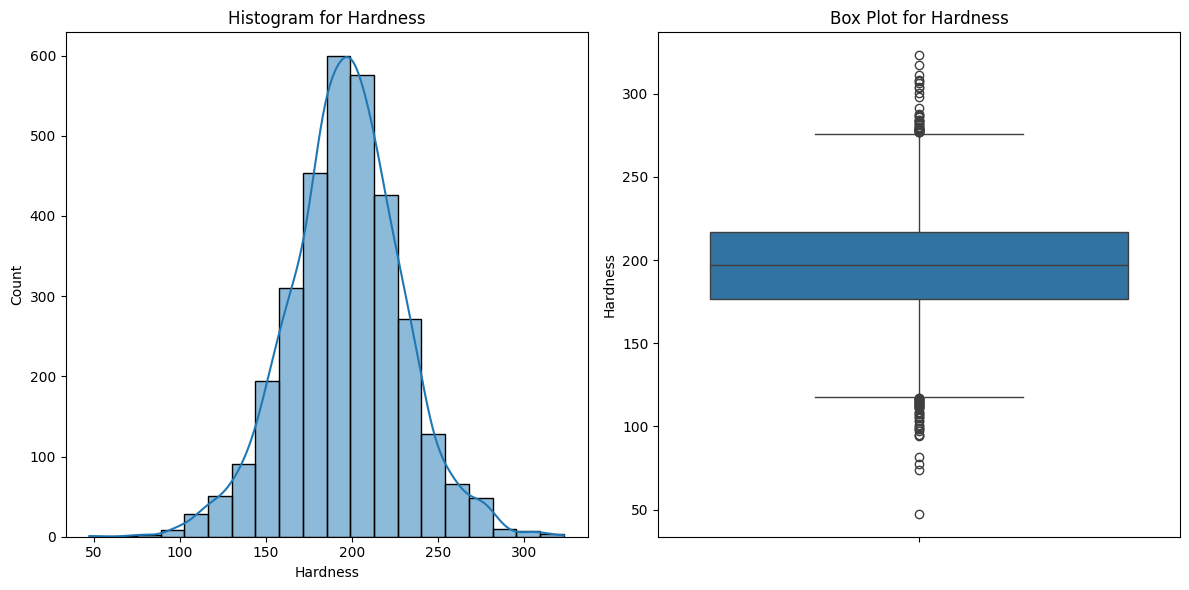

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

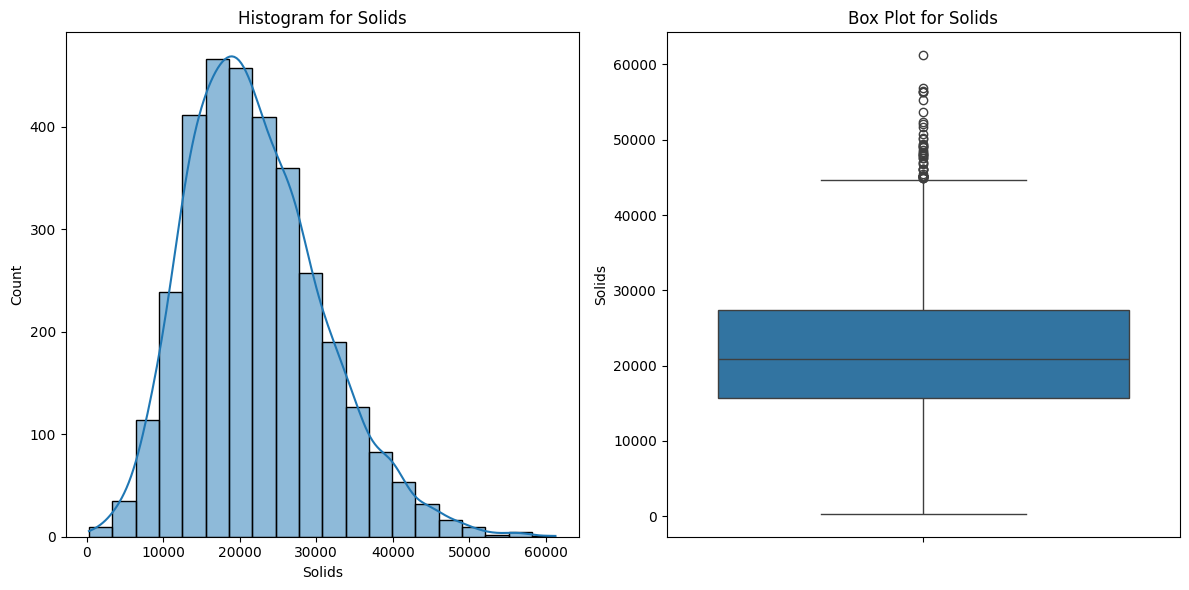

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

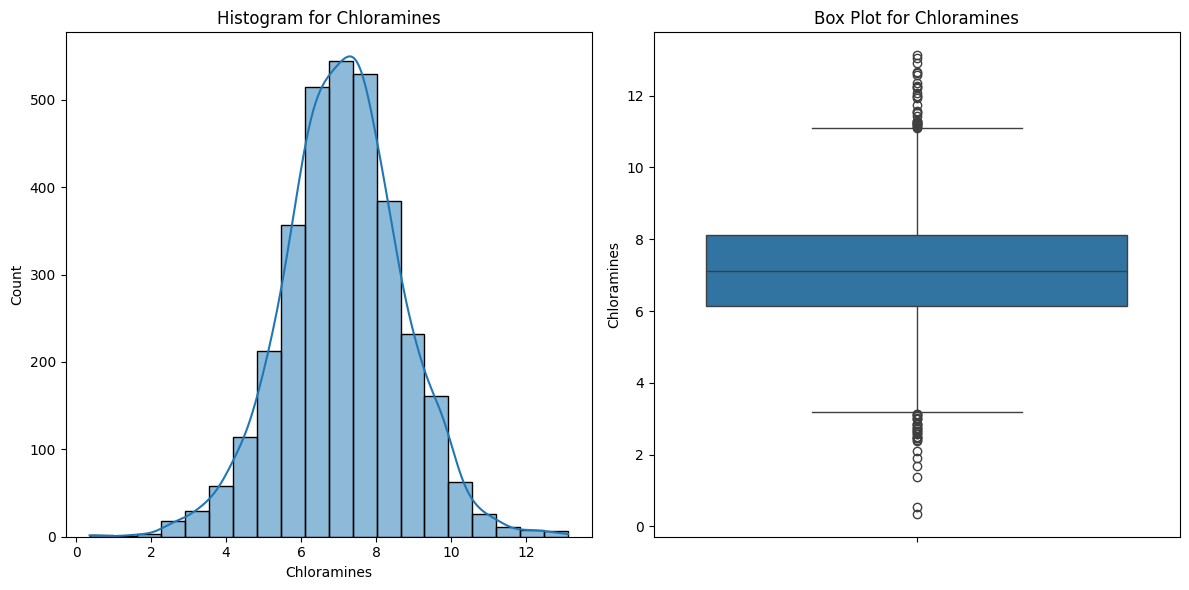

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64

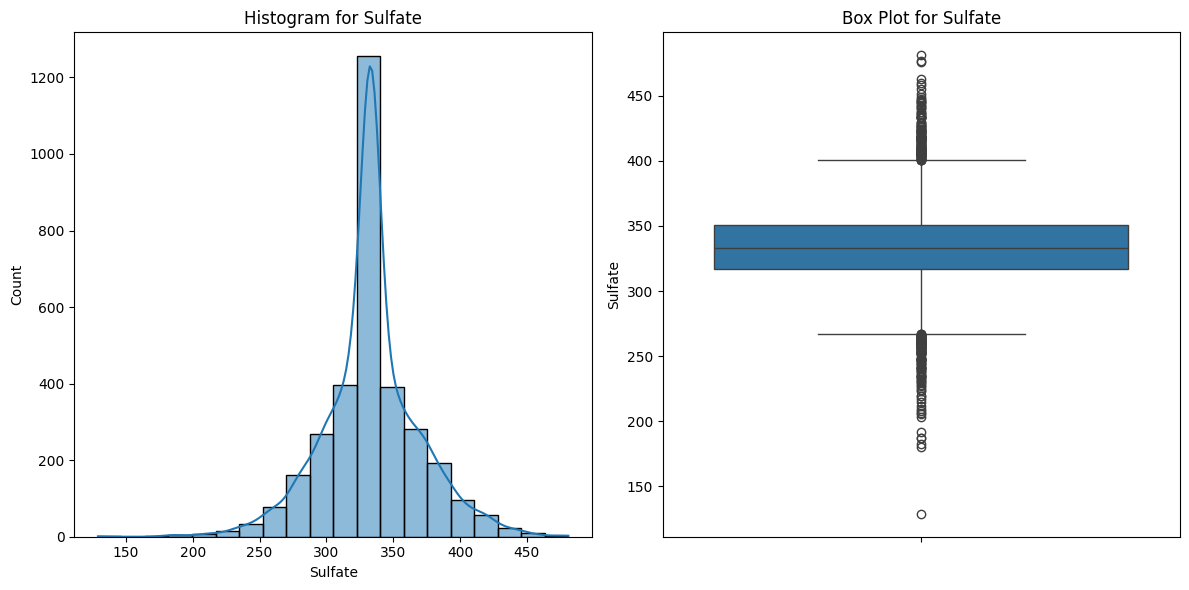

count    3276.000000
mean      333.608364
std        36.143851
min       129.000000
25%       317.094638
50%       333.073546
75%       350.385756
max       481.030642
Name: Sulfate, dtype: float64

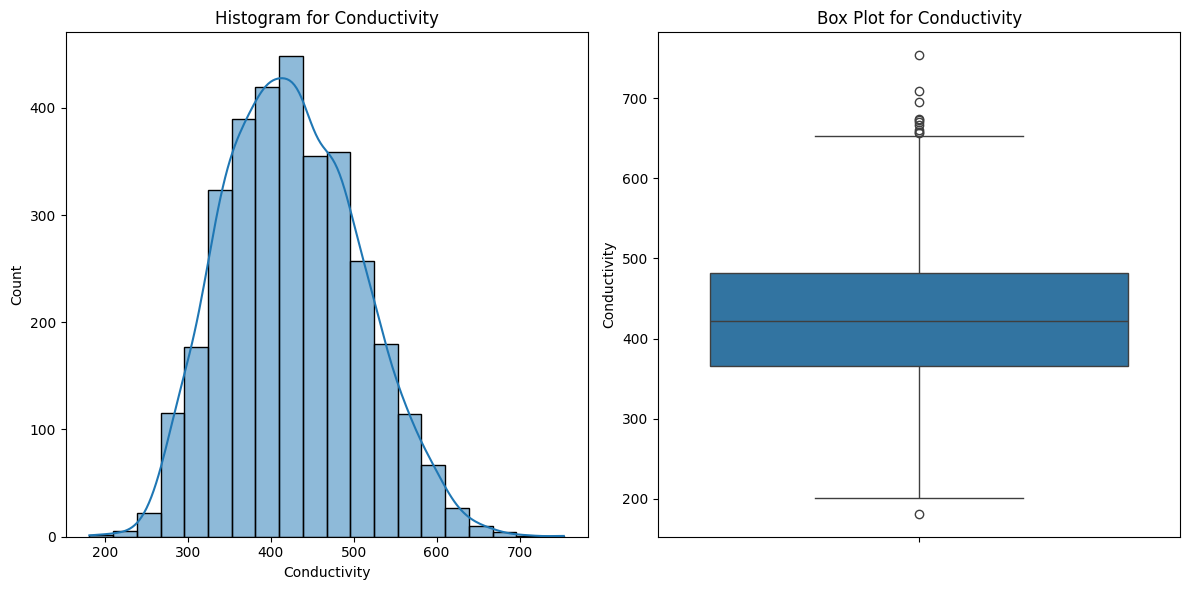

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

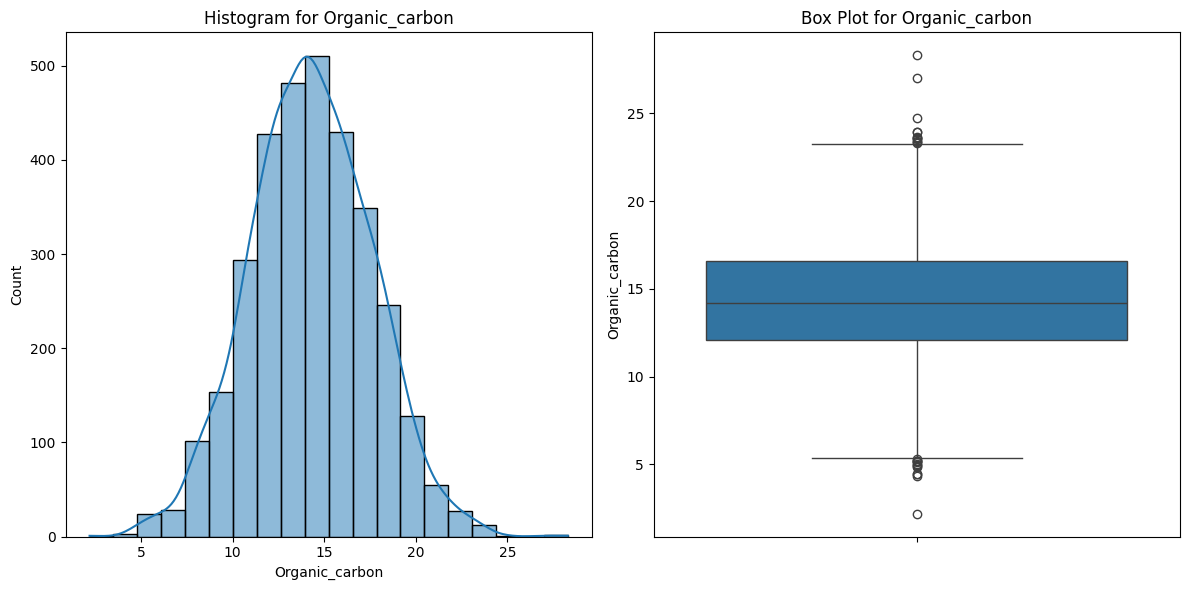

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64

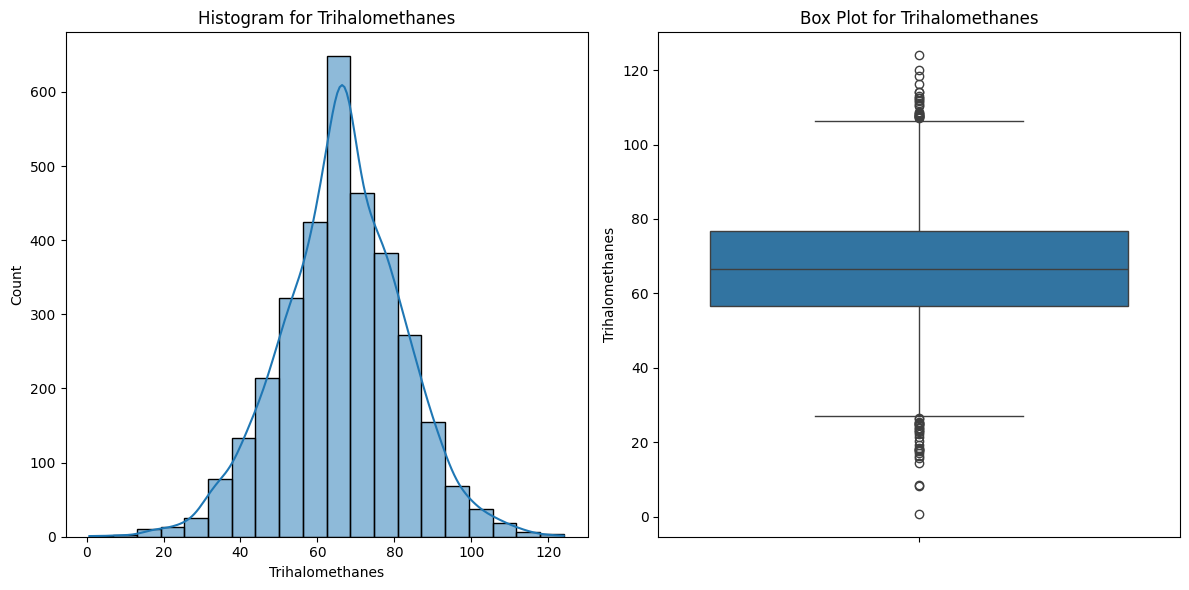

count    3276.000000
mean       66.407478
std        15.769958
min         0.738000
25%        56.647656
50%        66.622485
75%        76.666609
max       124.000000
Name: Trihalomethanes, dtype: float64

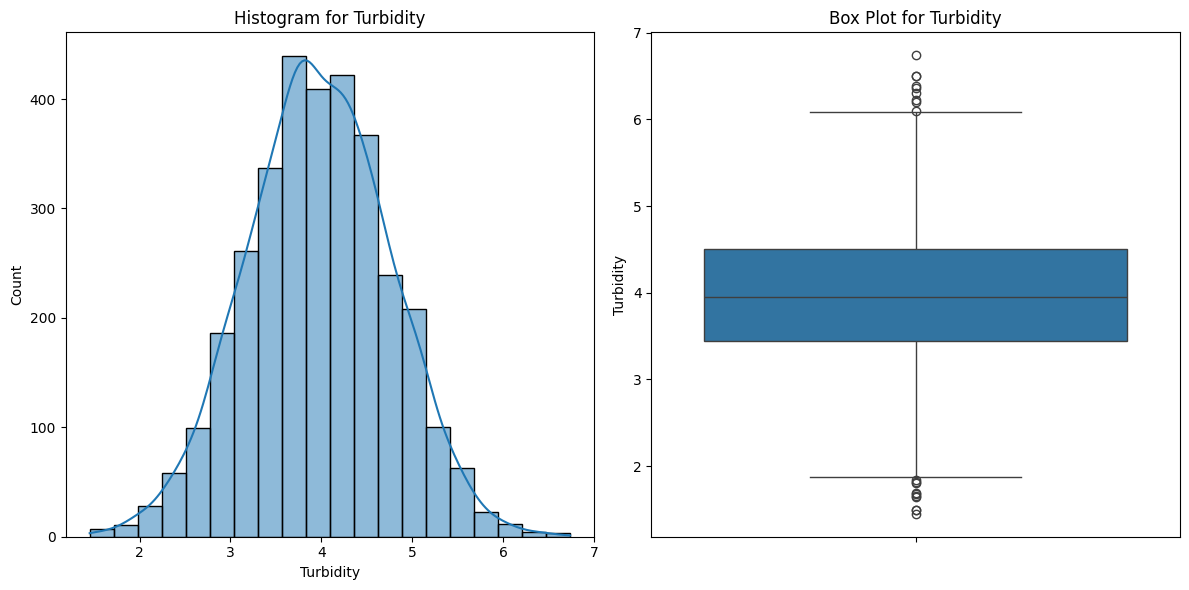

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64

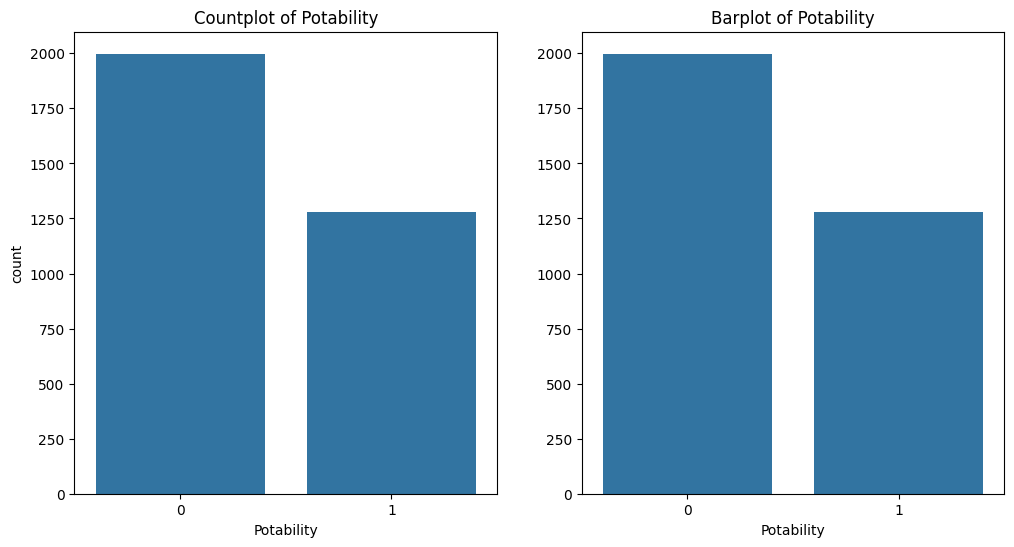

In [430]:
univariate(df)

## Observations: 

* First of all we convert the one numerical column which is target feature contianing class 0 and 1 in to catagorical for executing or performing Bivariate analysis 

* Here, we used function which contain 'for loop' for all the features and a target in this program loop execute, after the execution of the loop we check the condition.

* If the data is numerical then we have two plots for visualizations known as boxplot and histogram

* If the data is categorical then also we have two plots known as countplot and barplot

* As per our dataset visualization, the numrical columns contain more outliers 

* Target column contain  1250 or more '1s' and  near about 2000 '0s'



# Bivariate Analysis

In [431]:
df.shape

(3276, 10)

In [432]:
numercial_feat=df.iloc[:,:9]

In [433]:
corr=numercial_feat.corr()

<Axes: >

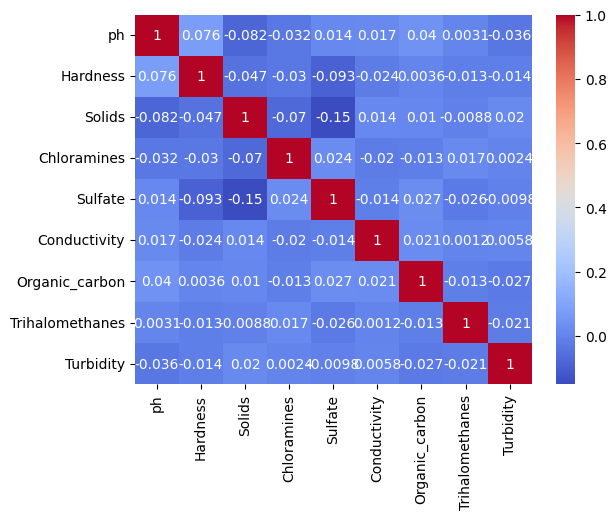

In [434]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

### Observations:

* Almost all columns are very different from each other 

In [435]:
def Bivariate(df,target='Potability'):
    for col in df.columns:
        if col != 'Potability':
            plt.figure(figsize=(10,6))
            sns.boxplot(x=df[target],y=df[col],hue=df[target])
            plt.title(f"Boxplot of {col} vs {target}")
            plt.xlabel(target)
            plt.ylabel(col)
            plt.show()
        

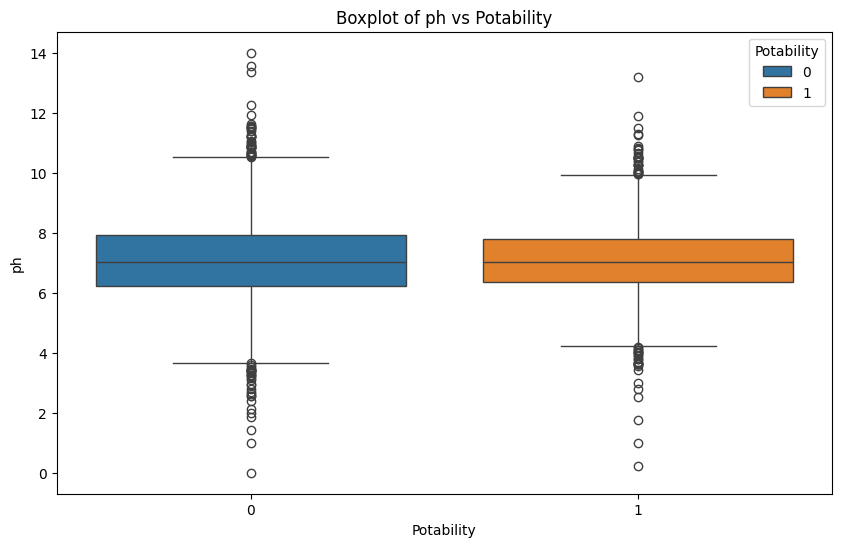

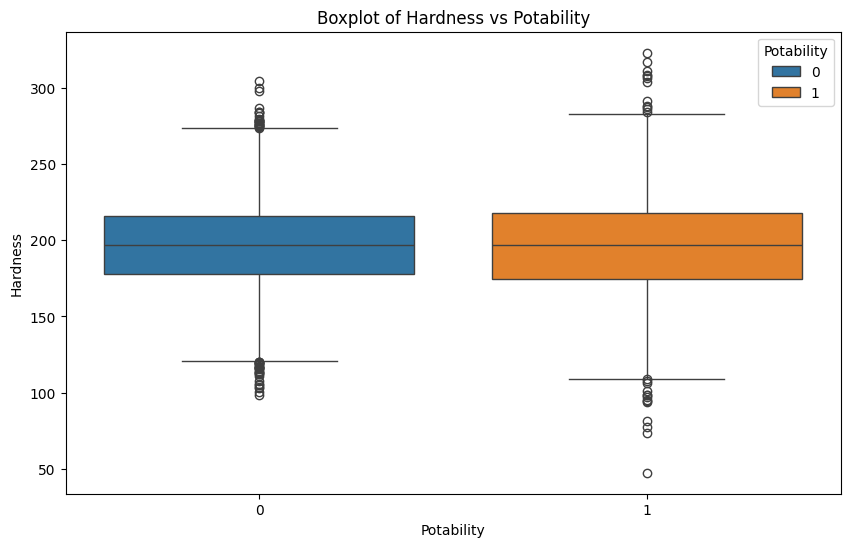

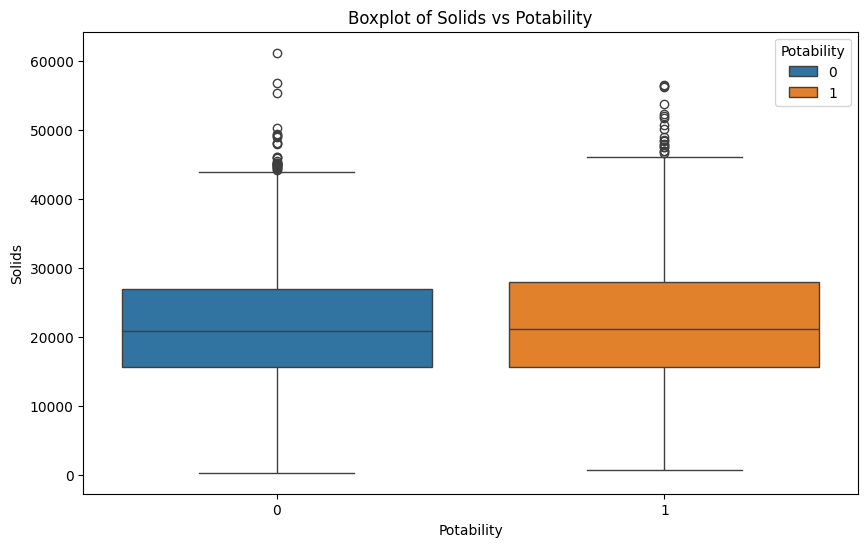

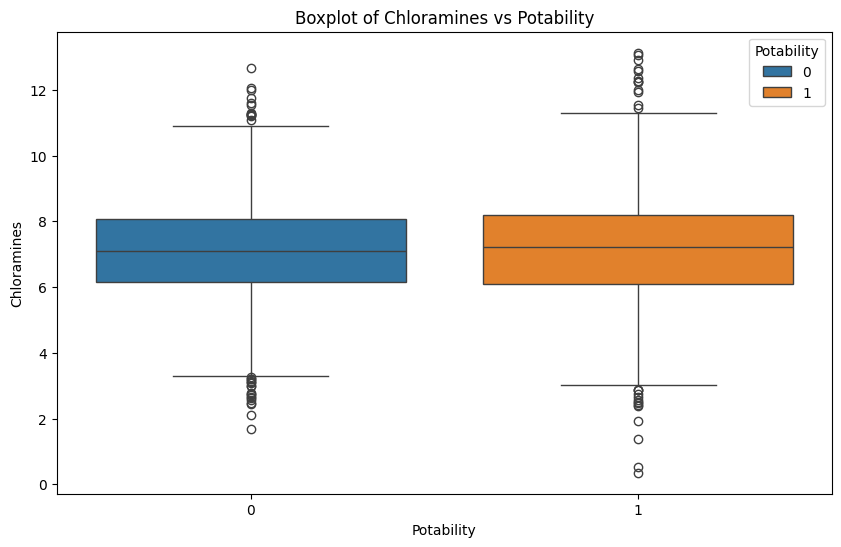

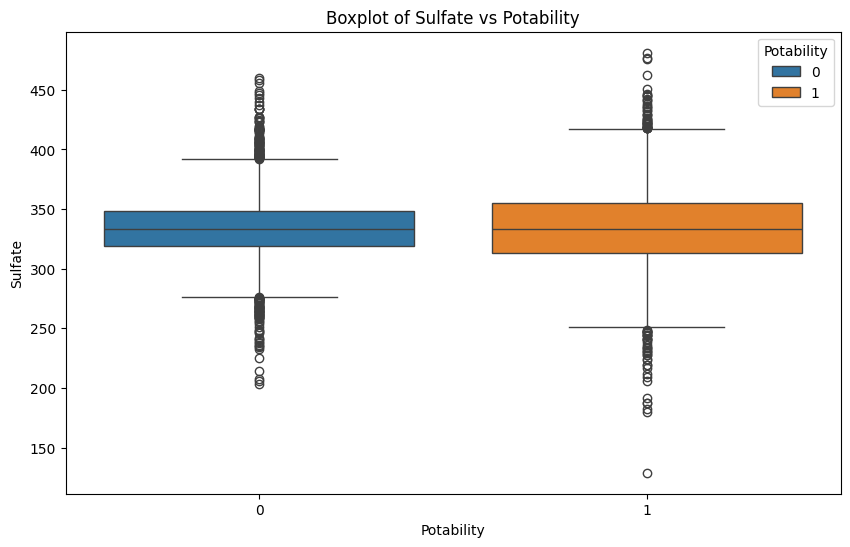

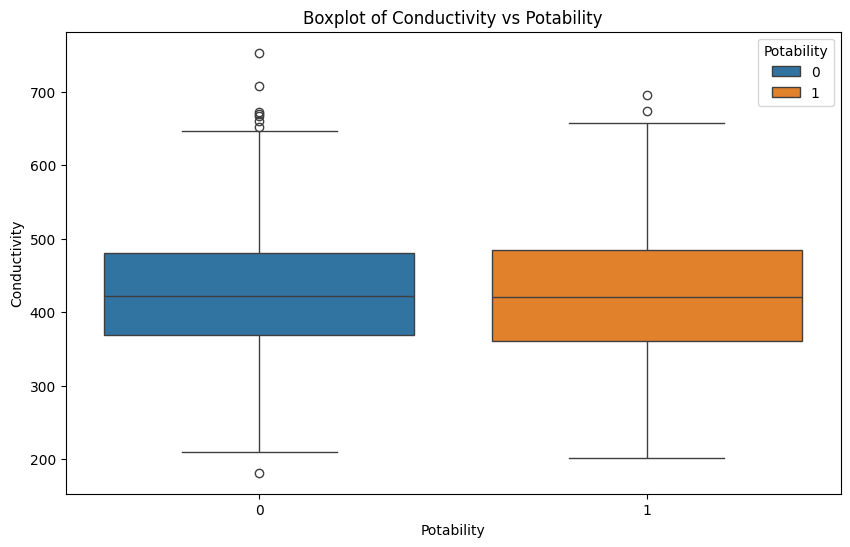

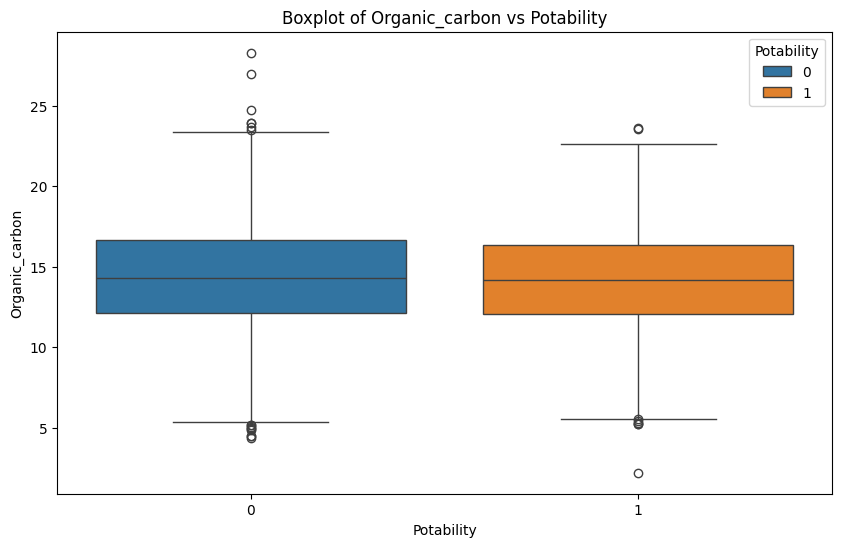

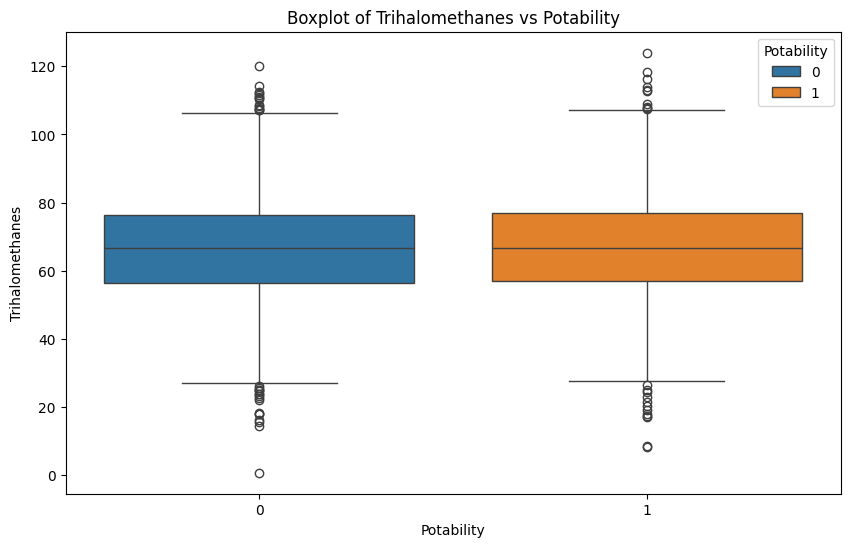

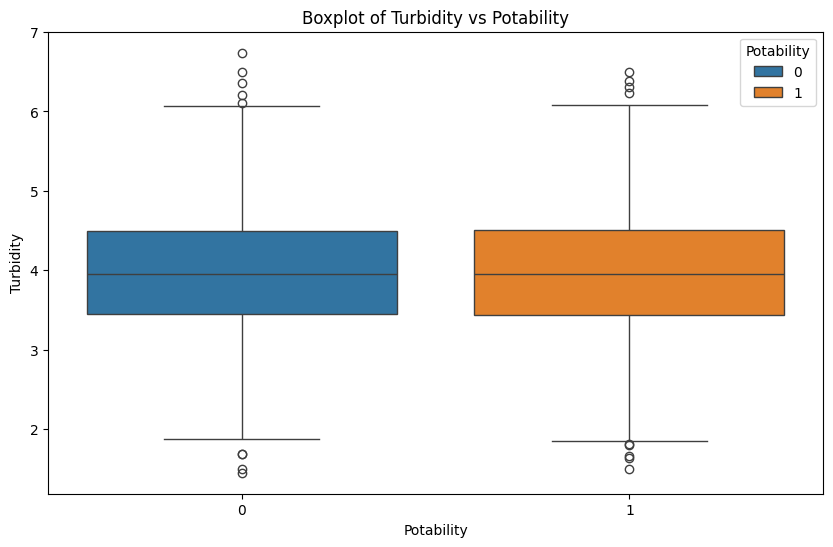

In [436]:
Bivariate(df)

### Observations:

* In Bivarite analysis we check the distributon of the Categorical vs Numerical 

# Multivariate Analysis

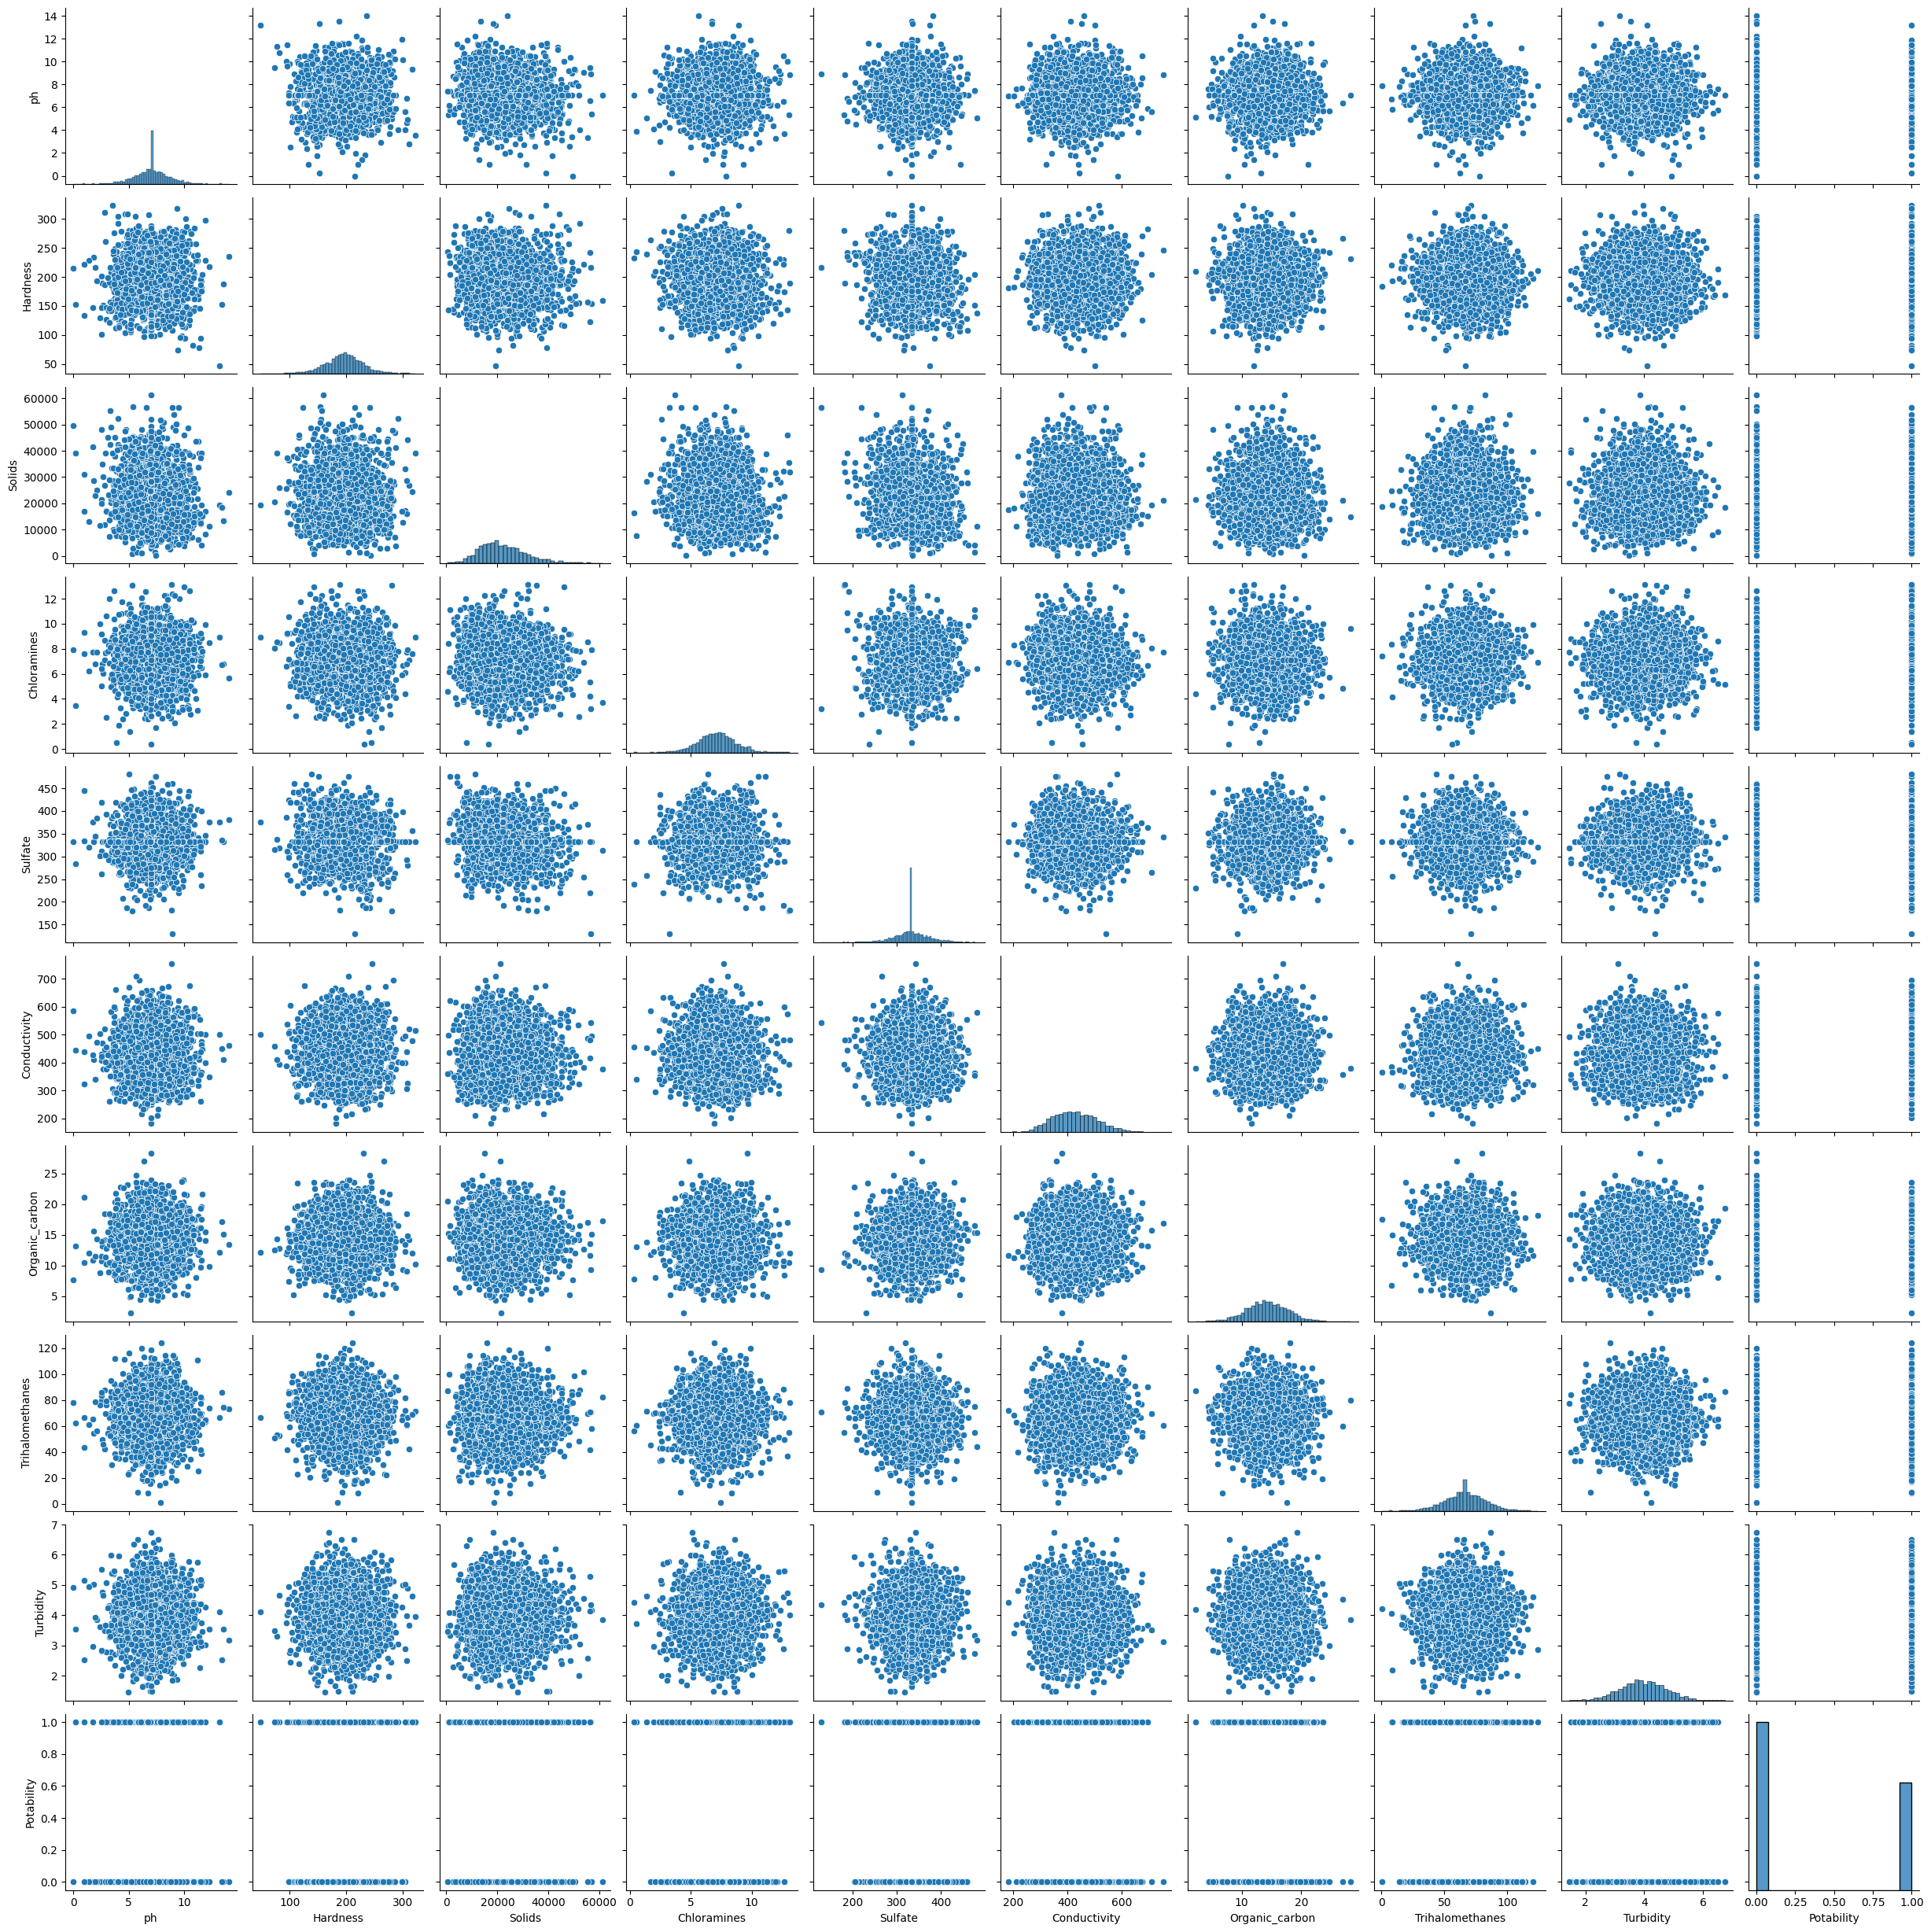

In [437]:
sns.pairplot(df)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


In [439]:
df.Potability=df.Potability.astype('int64')

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Feature Engineering And Machine Learning 

In [441]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [442]:
X=df.iloc[:,:-1]

In [443]:
X.shape

(3276, 9)

In [444]:
y=df.iloc[:,-1]

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
from sklearn.preprocessing import StandardScaler

In [446]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Supervised Learning Algorithms 

## LogisticRegression Algorithm

In [447]:
lgs=LogisticRegression()


In [448]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8
0,-0.031606,0.182598,0.021387,-0.128667,-0.798788,0.093694,-0.170620,-0.142475,0.674636
1,-1.207582,0.232327,0.036502,0.596318,-0.518805,-0.336436,-0.086245,1.050091,-1.326670
2,0.183200,-0.089590,0.527182,2.099015,-0.674708,1.605515,0.688623,-0.339321,-0.374981
3,0.362740,0.880831,-0.819205,0.551191,0.638880,-1.048150,0.224409,-0.665488,-1.308800
4,0.027218,-0.401213,1.042088,-1.711136,-0.017358,-0.183202,-0.058249,0.674293,-0.263431


In [449]:
lgs.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [450]:
y_pred=lgs.predict(X_test)

In [451]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [452]:
print(f'Classification Report {classification_report(y_test,y_pred)}')
print(f'ROC AUC Score:  {roc_auc_score(y_test,y_pred)}\n')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Classification Report               precision    recall  f1-score   support

           0       0.62      1.00      0.77       510
           1       0.00      0.00      0.00       309

    accuracy                           0.62       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.62      0.48       819

ROC AUC Score:  0.5

Confusion Matrix:
 [[510   0]
 [309   0]]


c:\Users\nevha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nevha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nevha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

## K-Nearest Neighbors Algorithm

In [453]:
from sklearn.neighbors import KNeighborsClassifier

In [454]:
knn=KNeighborsClassifier(n_neighbors=5)


In [455]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [456]:
y_pred=knn.predict(X_test)

In [457]:
print(f'Classification Report {classification_report(y_test,y_pred)}')
print(f'ROC AUC Score:  {roc_auc_score(y_test,y_pred)}\n')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Classification Report               precision    recall  f1-score   support

           0       0.68      0.76      0.72       510
           1       0.50      0.40      0.45       309

    accuracy                           0.63       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.63      0.61       819

ROC AUC Score:  0.5810394060536835

Confusion Matrix:
 [[388 122]
 [185 124]]


## Decision Tree Algorithm

In [458]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model_tree=DecisionTreeClassifier(max_depth=2)
model_tree.fit(X_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [459]:
y_pred=model_tree.predict(X_test)

[Text(0.5, 0.8333333333333334, 'x[4] <= -2.123\ngini = 0.478\nsamples = 2457\nvalue = [1488, 969]'),
 Text(0.25, 0.5, 'x[0] <= -0.674\ngini = 0.358\nsamples = 60\nvalue = [14, 46]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.245\nsamples = 49\nvalue = [7, 42]'),
 Text(0.75, 0.5, 'x[4] <= 0.824\ngini = 0.474\nsamples = 2397\nvalue = [1474, 923]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.464\nsamples = 1969\nvalue = [1248, 721]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.498\nsamples = 428\nvalue = [226, 202]')]

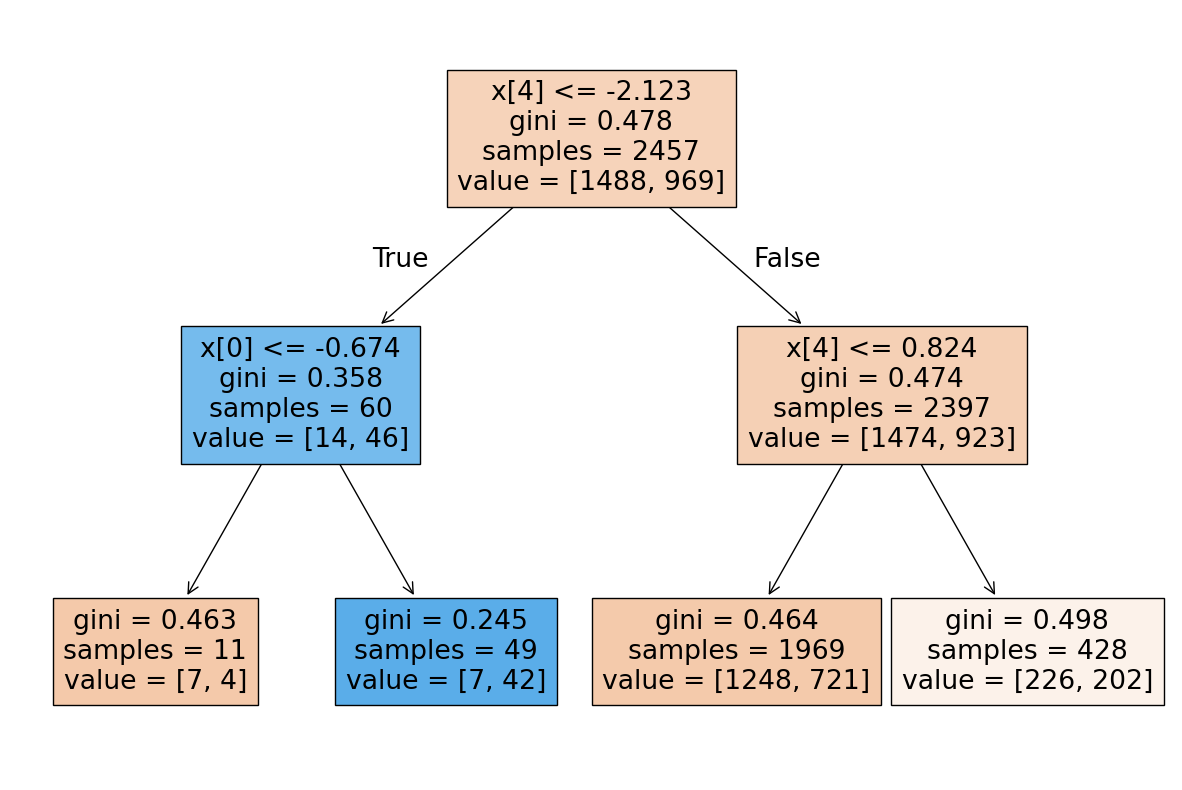

In [460]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_tree,filled=True)

In [461]:
print(f'Classification Report {classification_report(y_test,y_pred)}')
print(f'ROC AUC Score:  {roc_auc_score(y_test,y_pred)}\n')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Classification Report               precision    recall  f1-score   support

           0       0.63      0.99      0.77       510
           1       0.75      0.04      0.07       309

    accuracy                           0.63       819
   macro avg       0.69      0.52      0.42       819
weighted avg       0.68      0.63      0.51       819

ROC AUC Score:  0.5154959071007044

Confusion Matrix:
 [[506   4]
 [297  12]]


## Random Forest Algorithm

In [462]:
from sklearn.ensemble import RandomForestClassifier


In [463]:
rndCls=RandomForestClassifier()

In [464]:
rndCls.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [465]:
y_pred=rndCls.predict(X_test)

In [466]:
print(f'Classification Report {classification_report(y_test,y_pred)}')
print(f'ROC AUC Score:  {roc_auc_score(y_test,y_pred)}\n')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Classification Report               precision    recall  f1-score   support

           0       0.69      0.86      0.77       510
           1       0.61      0.36      0.45       309

    accuracy                           0.67       819
   macro avg       0.65      0.61      0.61       819
weighted avg       0.66      0.67      0.65       819

ROC AUC Score:  0.6093660765276985

Confusion Matrix:
 [[440  70]
 [199 110]]


## Model Performance Comparison

| Model                  | Accuracy |
|------------------------|----------|
| Logistic Regression    | 0.62     |
| KNN                    | 0.63     |
| Decision Tree          | 0.63     |
| Random Forest (Tuned)  | 0.68     |


### Observation:

* After scalling we fit he model on training data Then we apply it on testin data we try 4 different algorithm name as Logistic Regression, K-Nearest Neighbor, Decision Tree and Random Forest Algorithms we get accuracies 61,63,60 and 67 

* We got highest accurcy 68 using random forest algorithm and got lowest accuracy 62 using Decision Tree, all factors are depends up on our dataset 

* Our next step is hyperparameter tuning 


# Hyperparameter tuning 

In [467]:
randomcv_params={
            "max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]
}

In [468]:
rndcv_models=[
    ('RF',RandomForestClassifier(),randomcv_params)
]

In [469]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name,model,params in rndcv_models:
  random=RandomizedSearchCV(estimator=model,param_distributions=randomcv_params, n_iter=100,cv=3,verbose=2,n_jobs=-1)
  random.fit(X_train,y_train)
  model_params[name]=random.best_params_
for model_name in model_params:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\nevha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
81 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nevha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nevha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\U

---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [470]:
# {'n_estimators': 200, 'min_samples_split': 8, 'max_features': 7, 'max_depth': None}
# {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}

In [482]:
RndmCls=RandomForestClassifier(n_estimators = 500, min_samples_split = 2, max_features =8, max_depth = 15)

In [483]:
RndmCls.fit(X_train,y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [484]:
y_pred=RndmCls.predict(X_test)

In [485]:
print(f'Classification Report\n\n {classification_report(y_test,y_pred)}')
print(f'ROC AUC Score:  {roc_auc_score(y_test,y_pred)}\n')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Classification Report

               precision    recall  f1-score   support

           0       0.69      0.90      0.78       510
           1       0.67      0.35      0.46       309

    accuracy                           0.69       819
   macro avg       0.68      0.62      0.62       819
weighted avg       0.68      0.69      0.66       819

ROC AUC Score:  0.6211783742623262

Confusion Matrix:
 [[457  53]
 [202 107]]


### Observations:
* After applying Randamized Search CV for hyper tuning we get 0.69 Acurracy score 
* Now we will apply the Grid Search Cv 

In [475]:
params={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [476]:
rndcv_models=[
    ('RF',RandomForestClassifier(),params)
]

In [477]:
from sklearn.model_selection import GridSearchCV
model_params={}
for name,model,params in rndcv_models:
  grid=GridSearchCV(estimator=model ,param_grid=params,cv=3,verbose=2,n_jobs=-1)
  grid.fit(X_train,y_train)
  model_params[name]=random.best_params_
for model_name in model_params:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_params[model_name])

Fitting 3 folds for each of 216 candidates, totalling 648 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [492]:
Randomfrs=RandomForestClassifier(n_estimators = 500, min_samples_split = 2, max_features =7, max_depth = 15)

In [493]:
Randomfrs.fit(X_train,y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [494]:
y_pred=grid.predict(X_test)

In [495]:
print(f'Classification Report:\n\n{classification_report(y_test,y_pred)}')
print(f'ROC AUC Score:  {roc_auc_score(y_test,y_pred)}\n')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       510
           1       0.71      0.32      0.44       309

    accuracy                           0.69       819
   macro avg       0.70      0.62      0.62       819
weighted avg       0.70      0.69      0.66       819

ROC AUC Score:  0.6216162193032553

Confusion Matrix:
 [[469  41]
 [209 100]]


### Observarions:

* We got the result which is 0.69 accuracy rate 

* So as per Hyperparameter tuning , we used Randomized Search CV and   
 Grid Search CV, we got same same result which is 0.69 accuracy

## Final Conclusion
Among all the models tested, Random Forest with RandomizedSearchCV
performed best with an accuracy of 70%.

This project demonstrates the effectiveness of supervised machine learning
in predicting water potability using physicochemical parameters.
